# Description
Use the Simple Moving Average Crossover (and Python) to get buy and sell signals

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Define the ticker symbol (stock type)
ticker_symbol = "XOM"

# Create the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
start = "2020-03-01"
end="2020-12-01"
historical_data = ticker.history(start=start,end=end)
print("Historical Data:")
print(historical_data)

# Defining the df to prevent overwriting original data
df = historical_data

Historical Data:
                                Open       High        Low      Close  \
Date                                                                    
2020-03-02 00:00:00-05:00  40.728106  41.734885  39.597416  41.727142   
2020-03-03 00:00:00-05:00  41.781339  41.936229  39.481235  39.729057   
2020-03-04 00:00:00-05:00  40.449300  40.642911  39.589664  40.596443   
2020-03-05 00:00:00-05:00  39.047548  39.264395  37.978816  38.807472   
2020-03-06 00:00:00-05:00  37.823929  37.955583  36.553839  36.933315   
...                              ...        ...        ...        ...   
2020-11-23 00:00:00-05:00  30.917209  32.508415  30.735827  32.450703   
2020-11-24 00:00:00-05:00  33.398827  34.693230  33.159736  34.610783   
2020-11-25 00:00:00-05:00  34.355204  34.388183  33.514258  33.646172   
2020-11-27 00:00:00-05:00  33.555478  33.753346  32.871176  33.135002   
2020-11-30 00:00:00-05:00  32.813460  32.879418  31.304702  31.436615   

                             Volu

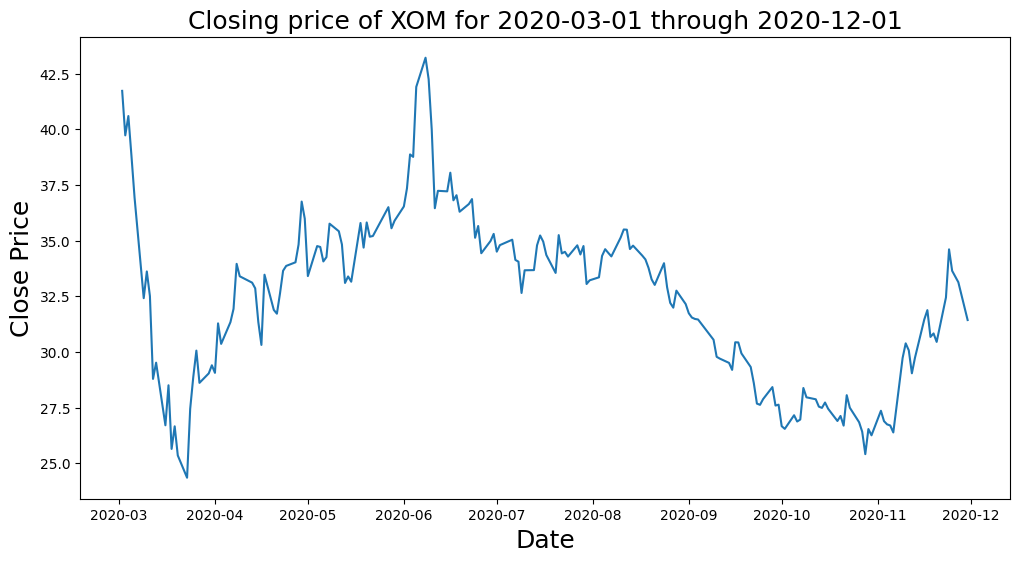

In [3]:
# Visually show the close price
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end}", fontsize=18)
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [10]:
# Create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=20, column="Close"):
    return data[column].rolling(window=period).mean()

# Creating some new columns for more data
def GenerateSMAPair(data,short,long):
    data[f"SMA{short}"] = SMA(data,period=short)
    data[f"SMA{long}"] = SMA(data,period=long)

    data["Signal {short}/{long}"] = np.where(data[f"SMA{short}"] > data[f"SMA{long}"], 1, 0)
    data["Position {short}/{long}"] = data["Signal {short}/{long}"].diff()
    data["Buy {short}/{long}"] = np.where(data["Position {short}/{long}"] == 1, data["Close"], np.nan)
    data["Sell {short}/{long}"] = np.where(data["Position {short}/{long}"] == -1, data["Close"], np.nan)

In [5]:
#Create two new columns to store the 20 and 50 day SMA
GenerateSMAPair(df,20,50)

In [6]:
# Get the buy and sell signals
df["Signal 20/50"] = np.where(df["SMA20"] > df["SMA50"], 1, 0)
df["Position 20/50"] = df["Signal 20/50"].diff()
df["Buy 20/50"] = np.where(df["Position 20/50"] == 1, df["Close"], np.nan)
df["Sell 20/50"] = np.where(df["Position 20/50"] == -1, df["Close"], np.nan)

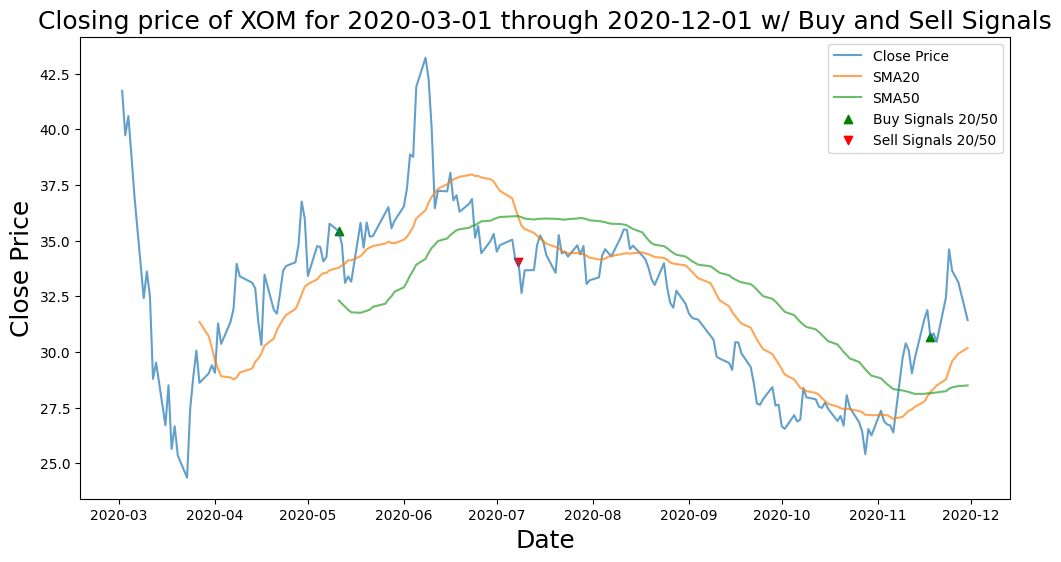

In [7]:
# Show the close price with SMAs and Buy/Sell signals
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Buy and Sell Signals", fontsize=18)
plt.plot(df["Close"],alpha=0.7,label="Close Price")
plt.plot(df["SMA20"],alpha=0.7,label="SMA20")
plt.plot(df["SMA50"],alpha=0.7,label="SMA50")
plt.scatter(df.index, df["Buy 20/50"],alpha=1,label="Buy Signals 20/50",marker="^",color="green")
plt.scatter(df.index, df["Sell 20/50"],alpha=1,label="Sell Signals 20/50",marker="v",color="red")

plt.legend()
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.savefig(f"imgs/{ticker_symbol}_{start}_{end}")
plt.show()

In [8]:
# Defining the daily returns
df["Daily Returns"] = df["Close"].pct_change()

# Display the daily returns
print(df["Daily Returns"])

Date
2020-03-02 00:00:00-05:00         NaN
2020-03-03 00:00:00-05:00   -0.047885
2020-03-04 00:00:00-05:00    0.021833
2020-03-05 00:00:00-05:00   -0.044067
2020-03-06 00:00:00-05:00   -0.048294
                               ...   
2020-11-23 00:00:00-05:00    0.065512
2020-11-24 00:00:00-05:00    0.066565
2020-11-25 00:00:00-05:00   -0.027870
2020-11-27 00:00:00-05:00   -0.015192
2020-11-30 00:00:00-05:00   -0.051257
Name: Daily Returns, Length: 191, dtype: float64


In [11]:
# Generate some more SMA pairs to test
GenerateSMAPair(df,10,30)
GenerateSMAPair(df,50,100)